In [7]:
if("quantmod" %in% rownames(installed.packages()) == FALSE) 
    {install.packages("quantmod")}
if("tidyquant" %in% rownames(installed.packages()) == FALSE) 
    {install.packages("tidyquant")}

In [8]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(GGally)
library(car)
library(janitor)
library(scales)

library(tidyquant)
library(tidyimpute)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: lubridate


Attaching pa

ERROR: Error in library(tidyimpute): there is no package called ‘tidyimpute’


In [9]:
options("getSymbols.warning4.0"=FALSE)
options("getSymbols.yahoo.warning"=FALSE)

# Project Proposal


**Yiou Long, Nikko Dumrique, Andres Zepeda, Medha Singh**

`Monday November 1st 2021`

### Introduction

***!!!DELETE***

Begin by providing some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.

Clearly state the question you will try to answer with your project. Your question should involve one random variable of interest (the response) and one or more explanatory variables. Of the response variable, explain whether your project is focused on prediction, inference, or both.

Identify and describe the dataset that will be used to answer the question. Remember, this dataset is allowed to contain more variables than you need, in fact, exploring how the different variables in the dataset affect your model, is a crucial part of the project.

Also, be sure to frame your question/objectives in terms of what is already known in the literature. Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section).

### Exploratory Data Analysis (EDA)

***!!!DELETE***

In this section, you will:

Demonstrate that the dataset can be read from the web into R.
Clean and wrangle your data into a tidy format.
Plot the relevant raw data, tailoring your plot in a way that addresses your question.
make sure to explore the association of the explanatory variables with the response.
your Exploratory Data Analysis (EDA) must be comprehensive with high quality plots.
Any summary tables that is relevant to your analysis.
Be sure to not print output that takes up a lot of screen space.

In [65]:
#pulling data from Yahoo finance API
intel_index <- tq_get(c('INTC','WAF.DE','AMD','LNVGY','AAPL','DELL'),
               from = "2014-09-01",
               to = "2019-03-01",
               get = "stock.price")

In [66]:
head(intel_index)
tail(intel_index)

nrow(intel_index)

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
INTC,2014-09-02,34.76,34.91,34.43,34.57,32094800,28.41109
INTC,2014-09-03,34.82,34.88,34.45,34.57,26668800,28.41109
INTC,2014-09-04,34.53,35.09,34.52,34.91,27632400,28.69053
INTC,2014-09-05,34.92,35.12,34.83,35.00,20841900,28.76449
INTC,2014-09-08,34.96,35.56,34.88,35.33,24859600,29.03570
INTC,2014-09-09,35.29,35.29,34.85,34.91,22333100,28.69053


symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
DELL,2019-02-21,28.16016,28.42372,28.01825,28.15002,3834131,28.15002
DELL,2019-02-22,28.29701,28.47440,28.15509,28.47440,3644723,28.47440
DELL,2019-02-25,28.61632,28.84440,28.54030,28.70755,4612085,28.70755
DELL,2019-02-26,28.53523,28.94577,28.19057,28.75317,4619188,28.75317
DELL,2019-02-27,28.65687,28.78865,28.47947,28.50988,3335948,28.50988
DELL,2019-02-28,28.48454,28.63659,27.96249,28.29194,8152633,28.29194


[1] 6109

In [67]:
intel_index = intel_index |> 
    pivot_wider(names_from = 'symbol', 
                values_from = c('open', 
                                'high',
                                'low',
                                'close',
                                'volume',
                                'adjusted'))

In [68]:
head(intel_index)
nrow(intel_index)

date,open_INTC,open_WAF.DE,open_AMD,open_LNVGY,open_AAPL,open_DELL,high_INTC,high_WAF.DE,high_AMD,⋯,volume_AMD,volume_LNVGY,volume_AAPL,volume_DELL,adjusted_INTC,adjusted_WAF.DE,adjusted_AMD,adjusted_LNVGY,adjusted_AAPL,adjusted_DELL
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2014-09-02,34.76,NA,4.16,31.30,25.7650,NA,34.91,NA,4.25,⋯,12603300,41800,214256000,NA,28.41109,NA,4.16,22.55763,23.31418,NA
2014-09-03,34.82,NA,4.17,31.90,25.7750,NA,34.88,NA,4.23,⋯,9600600,38300,501684000,NA,28.41109,NA,4.19,22.80851,22.33016,NA
2014-09-04,34.53,NA,4.18,31.69,24.7125,NA,35.09,NA,4.25,⋯,12791400,49900,342872000,NA,28.69053,NA,4.15,22.68665,22.14509,NA
2014-09-05,34.92,NA,4.17,31.77,24.7000,NA,35.12,NA,4.19,⋯,6630200,37000,233828000,NA,28.76449,NA,4.15,22.82285,22.33693,NA
2014-09-08,34.96,NA,4.13,32.50,24.8250,NA,35.56,NA,4.18,⋯,8396200,35100,185426800,NA,29.03570,NA,4.13,23.30310,22.19925,NA
2014-09-09,35.29,NA,4.15,32.64,24.7700,NA,35.29,NA,4.16,⋯,8964800,31600,759385200,NA,28.69053,NA,4.08,23.25292,22.11574,NA


[1] 1157

In [69]:
intel_index = intel_index[complete.cases(intel_index),]
nrow(intel_index)

[1] 627

In [71]:
#Correlation between response variables


index_correlation = intel_index[,2:37] |> 
  select(
    volume_INTC, 
    volume_WAF.DE,
    volume_AMD,
    volume_LNVGY,
    volume_AAPL,
    volume_DELL) |>
    ggpairs(progress = FALSE) +
    theme (
        text = element_text(size = 15),
        plot.title = element_text(face = "bold"),
        axis.title = element_text(face = "bold")
    )

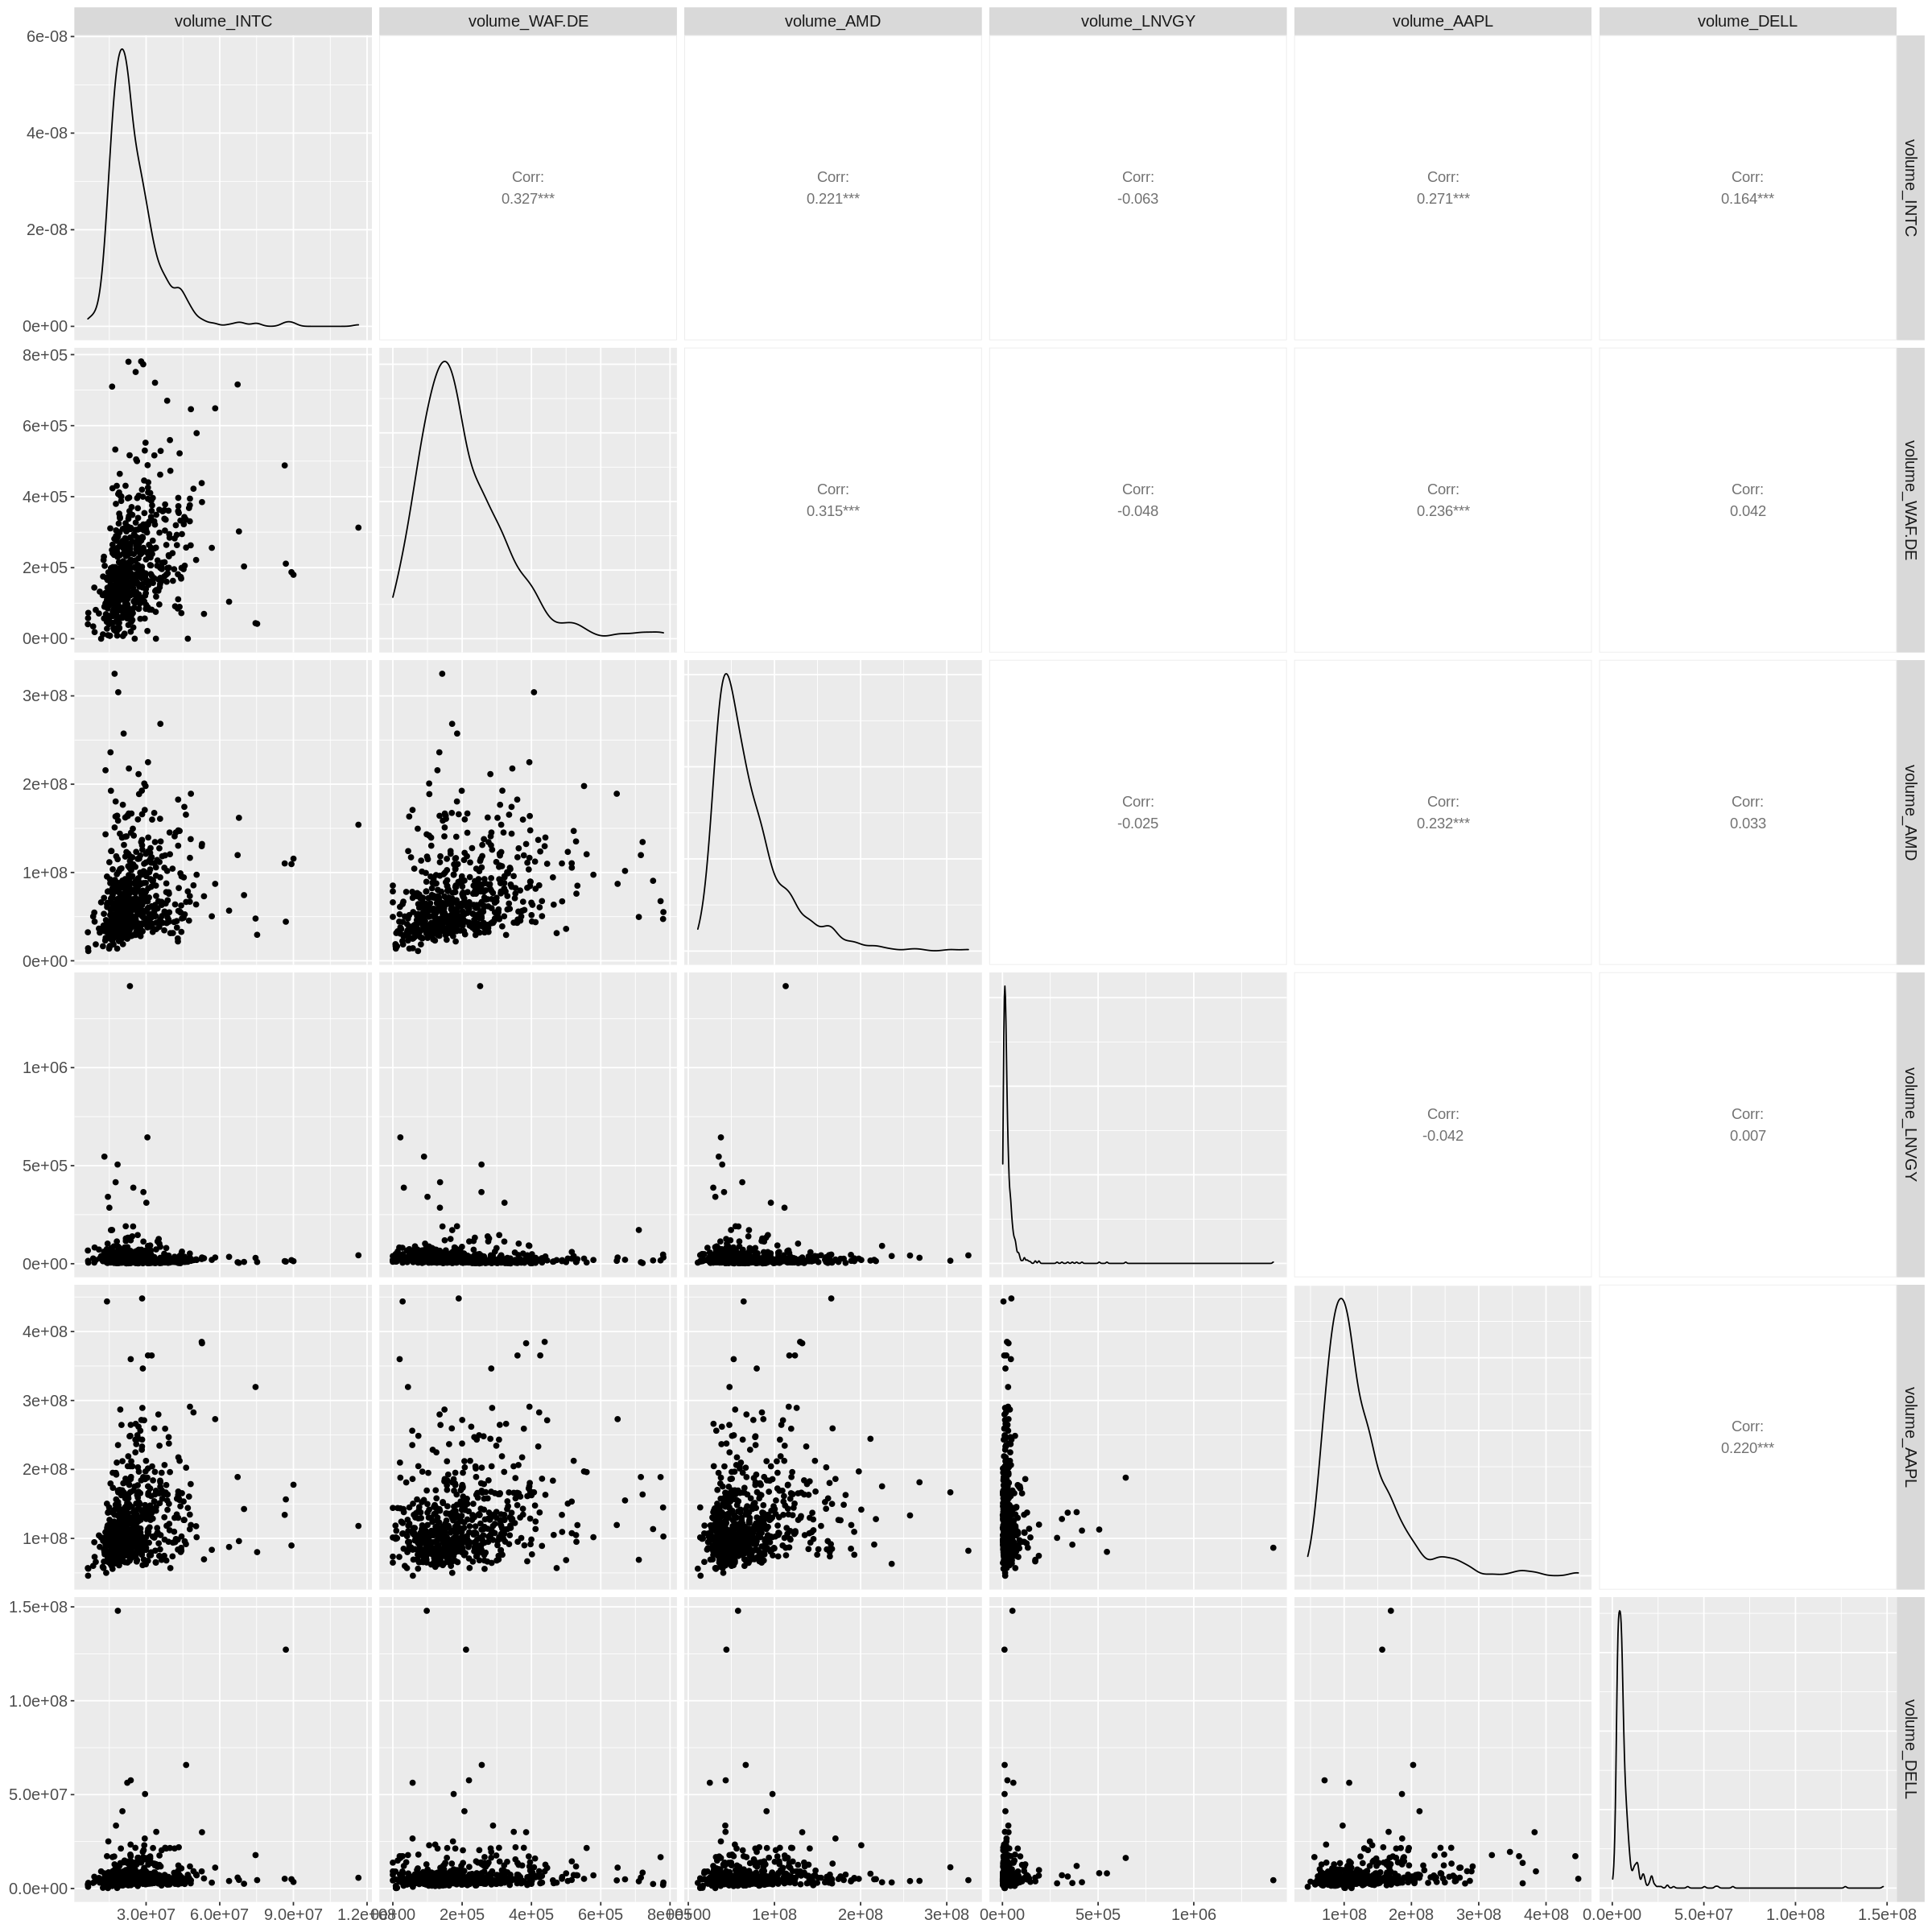

In [72]:
options(repr.plot.width = 20, repr.plot.height = 20)
index_correlation

In [73]:
corr_matrix_intel_index = intel_index[,2:37] |> 
  select(
    volume_INTC, 
    volume_WAF.DE,
    volume_AMD,
    volume_LNVGY,
    volume_AAPL,
    volume_DELL) |>
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")
head(corr_matrix_intel_index)

var1,var2,corr
<chr>,<chr>,<dbl>
volume_INTC,volume_INTC,1.00000000
volume_INTC,volume_WAF.DE,0.32677475
volume_INTC,volume_AMD,0.22081875
volume_INTC,volume_LNVGY,-0.06272807
volume_INTC,volume_AAPL,0.27059803
volume_INTC,volume_DELL,0.16371249


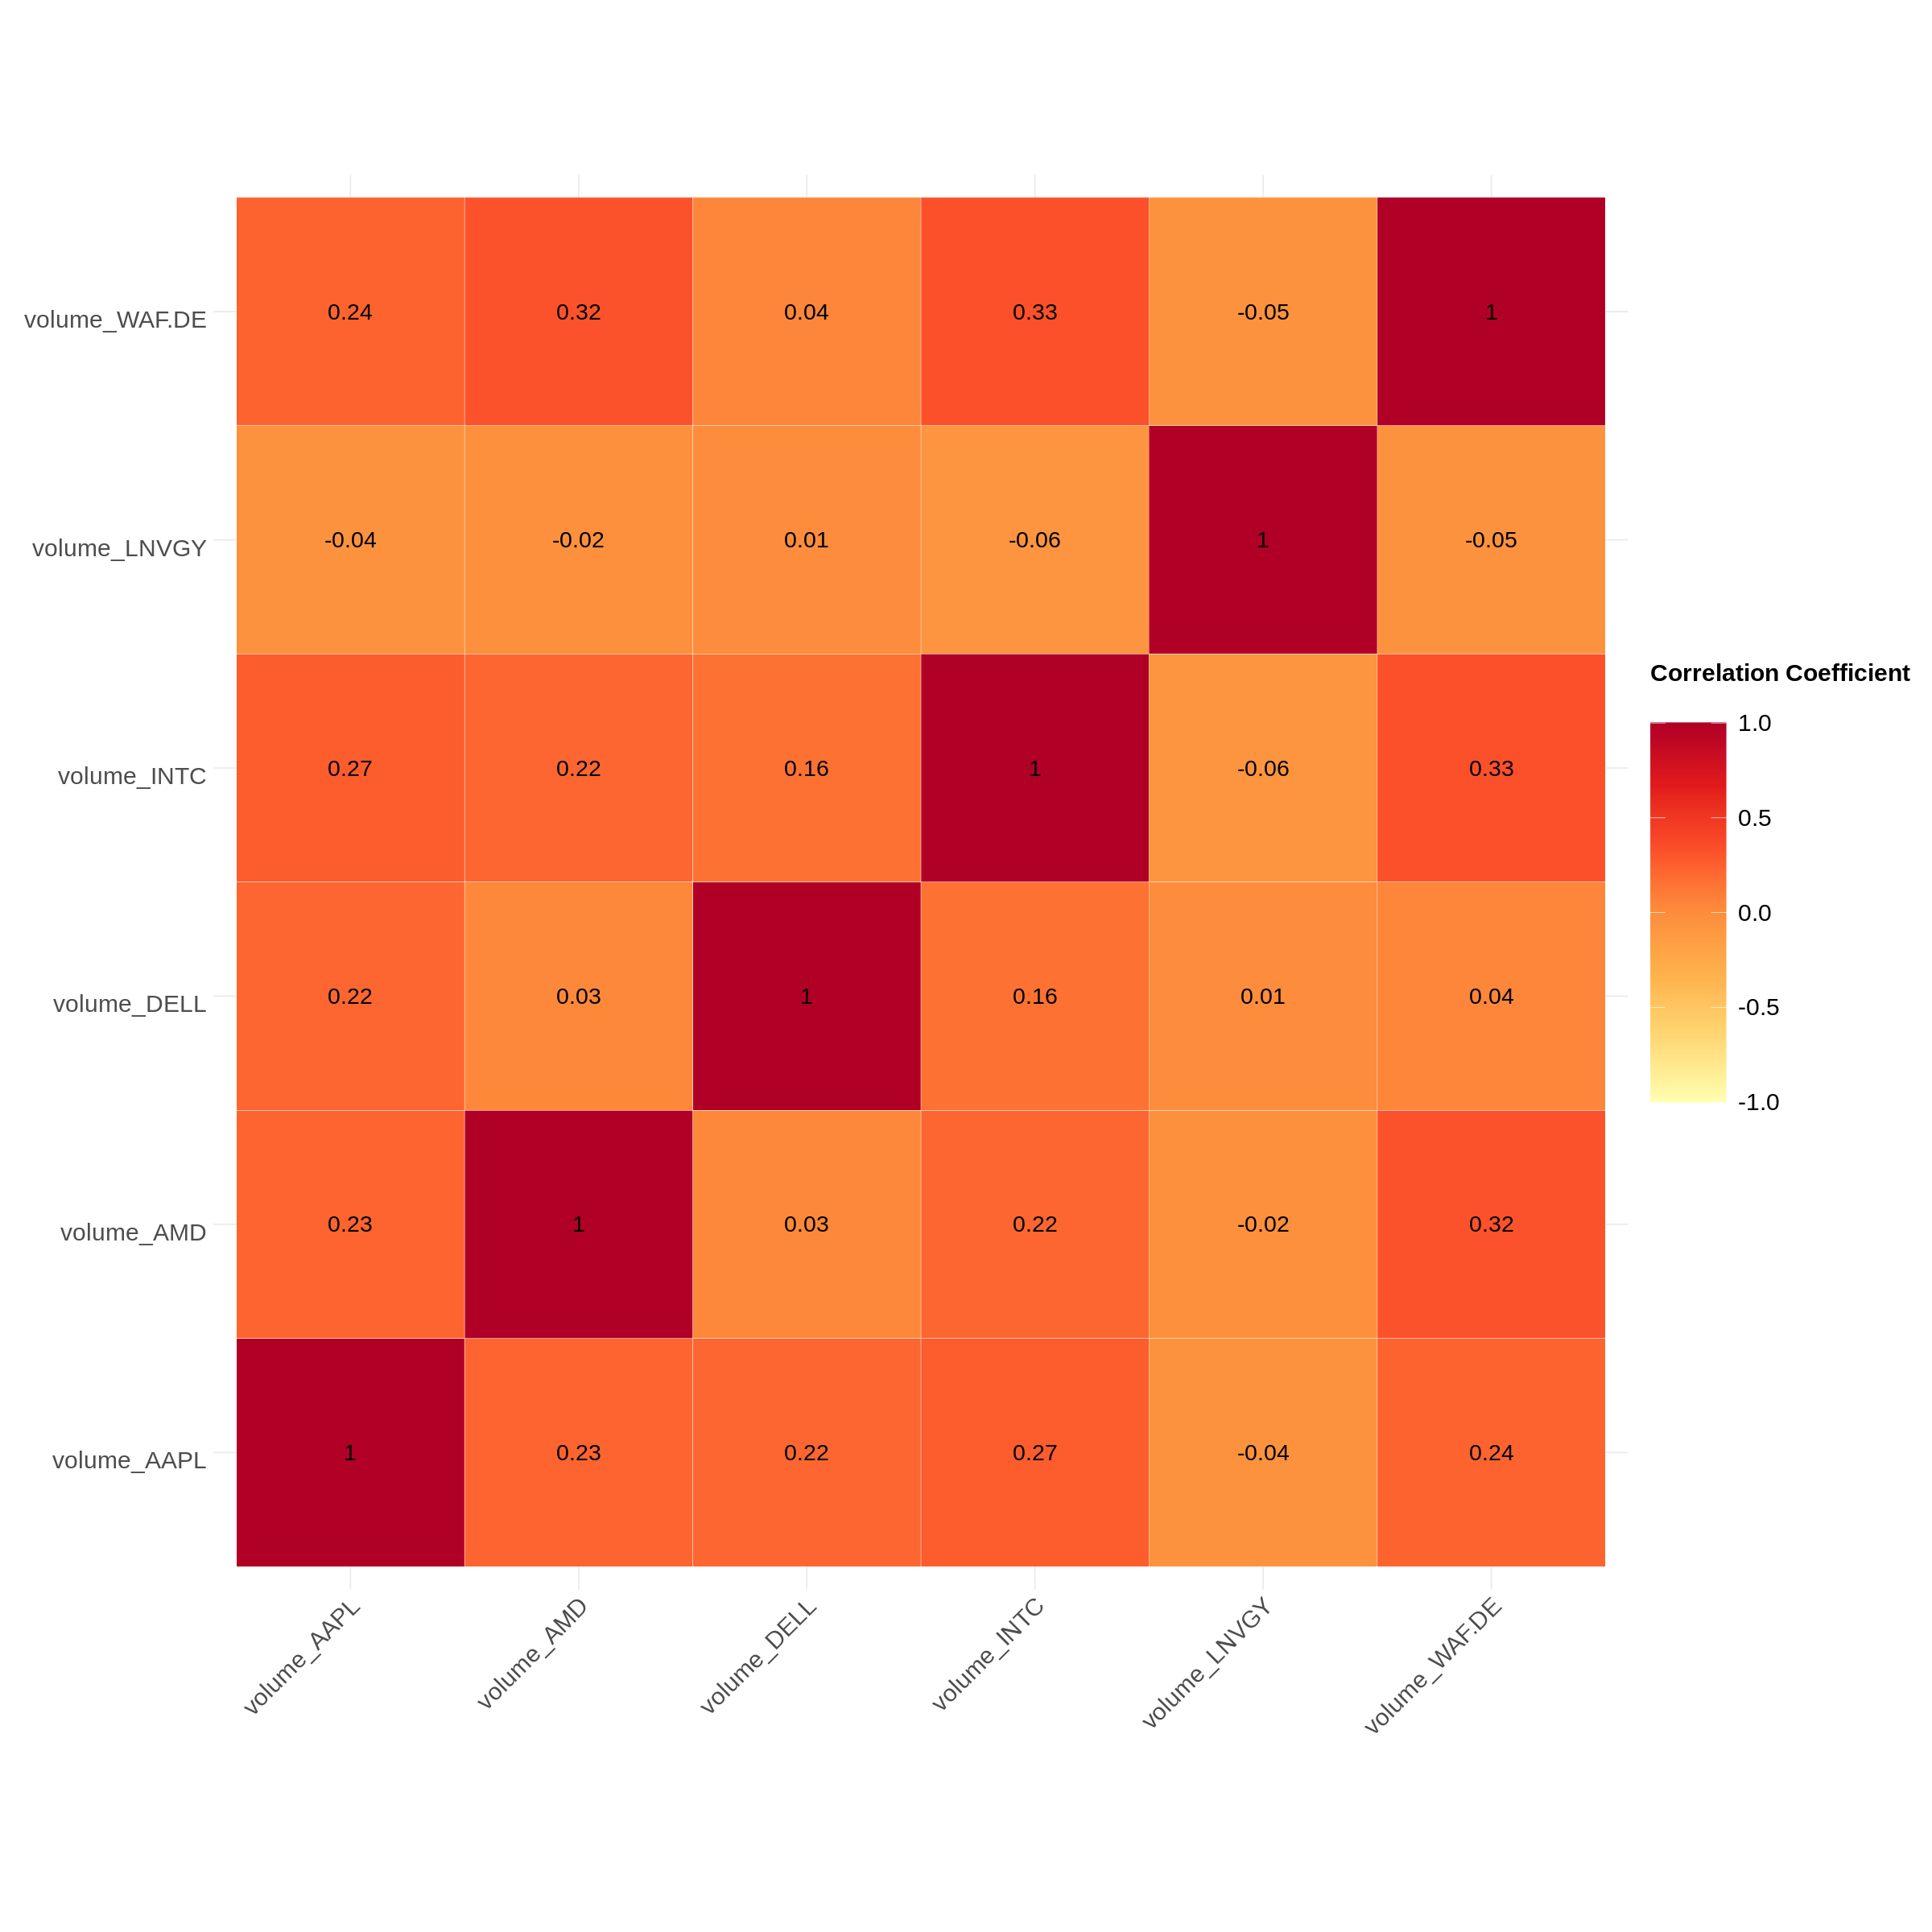

In [74]:
plt_index_corr_matrix <- corr_matrix_intel_index %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette = "YlOrRd",
    direction = 1, limits = c(-1, 1)
  ) +
  labs(x = "", y = "") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var2, var1, label = round(corr, 2)), color = "black", size = 6)
plt_index_corr_matrix

As we see above, there are several variables with high multicollinarity. This is not surprising as this data quantify essentially the same thing over different periods of time. We should account for this with Ridge Linear model. ... With this in mind, we will gather more data that assess the performance of supply chain.

In [45]:
corr_matrix_intel_index <- intel_index %>%
  ungroup() %>%
  select(
    adjusted_INTC, adjusted_WAF.DE, adjusted_AMD, volume_INTC, volume_WAF.DE, volume_AMD
  ) %>%
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")
head(corr_matrix_intel_index)

var1,var2,corr
<chr>,<chr>,<dbl>
adjusted_INTC,adjusted_INTC,1.00000000
adjusted_INTC,adjusted_WAF.DE,0.82565290
adjusted_INTC,adjusted_AMD,-0.46343230
adjusted_INTC,volume_INTC,0.33674428
adjusted_INTC,volume_WAF.DE,0.12949552
adjusted_INTC,volume_AMD,-0.01226064


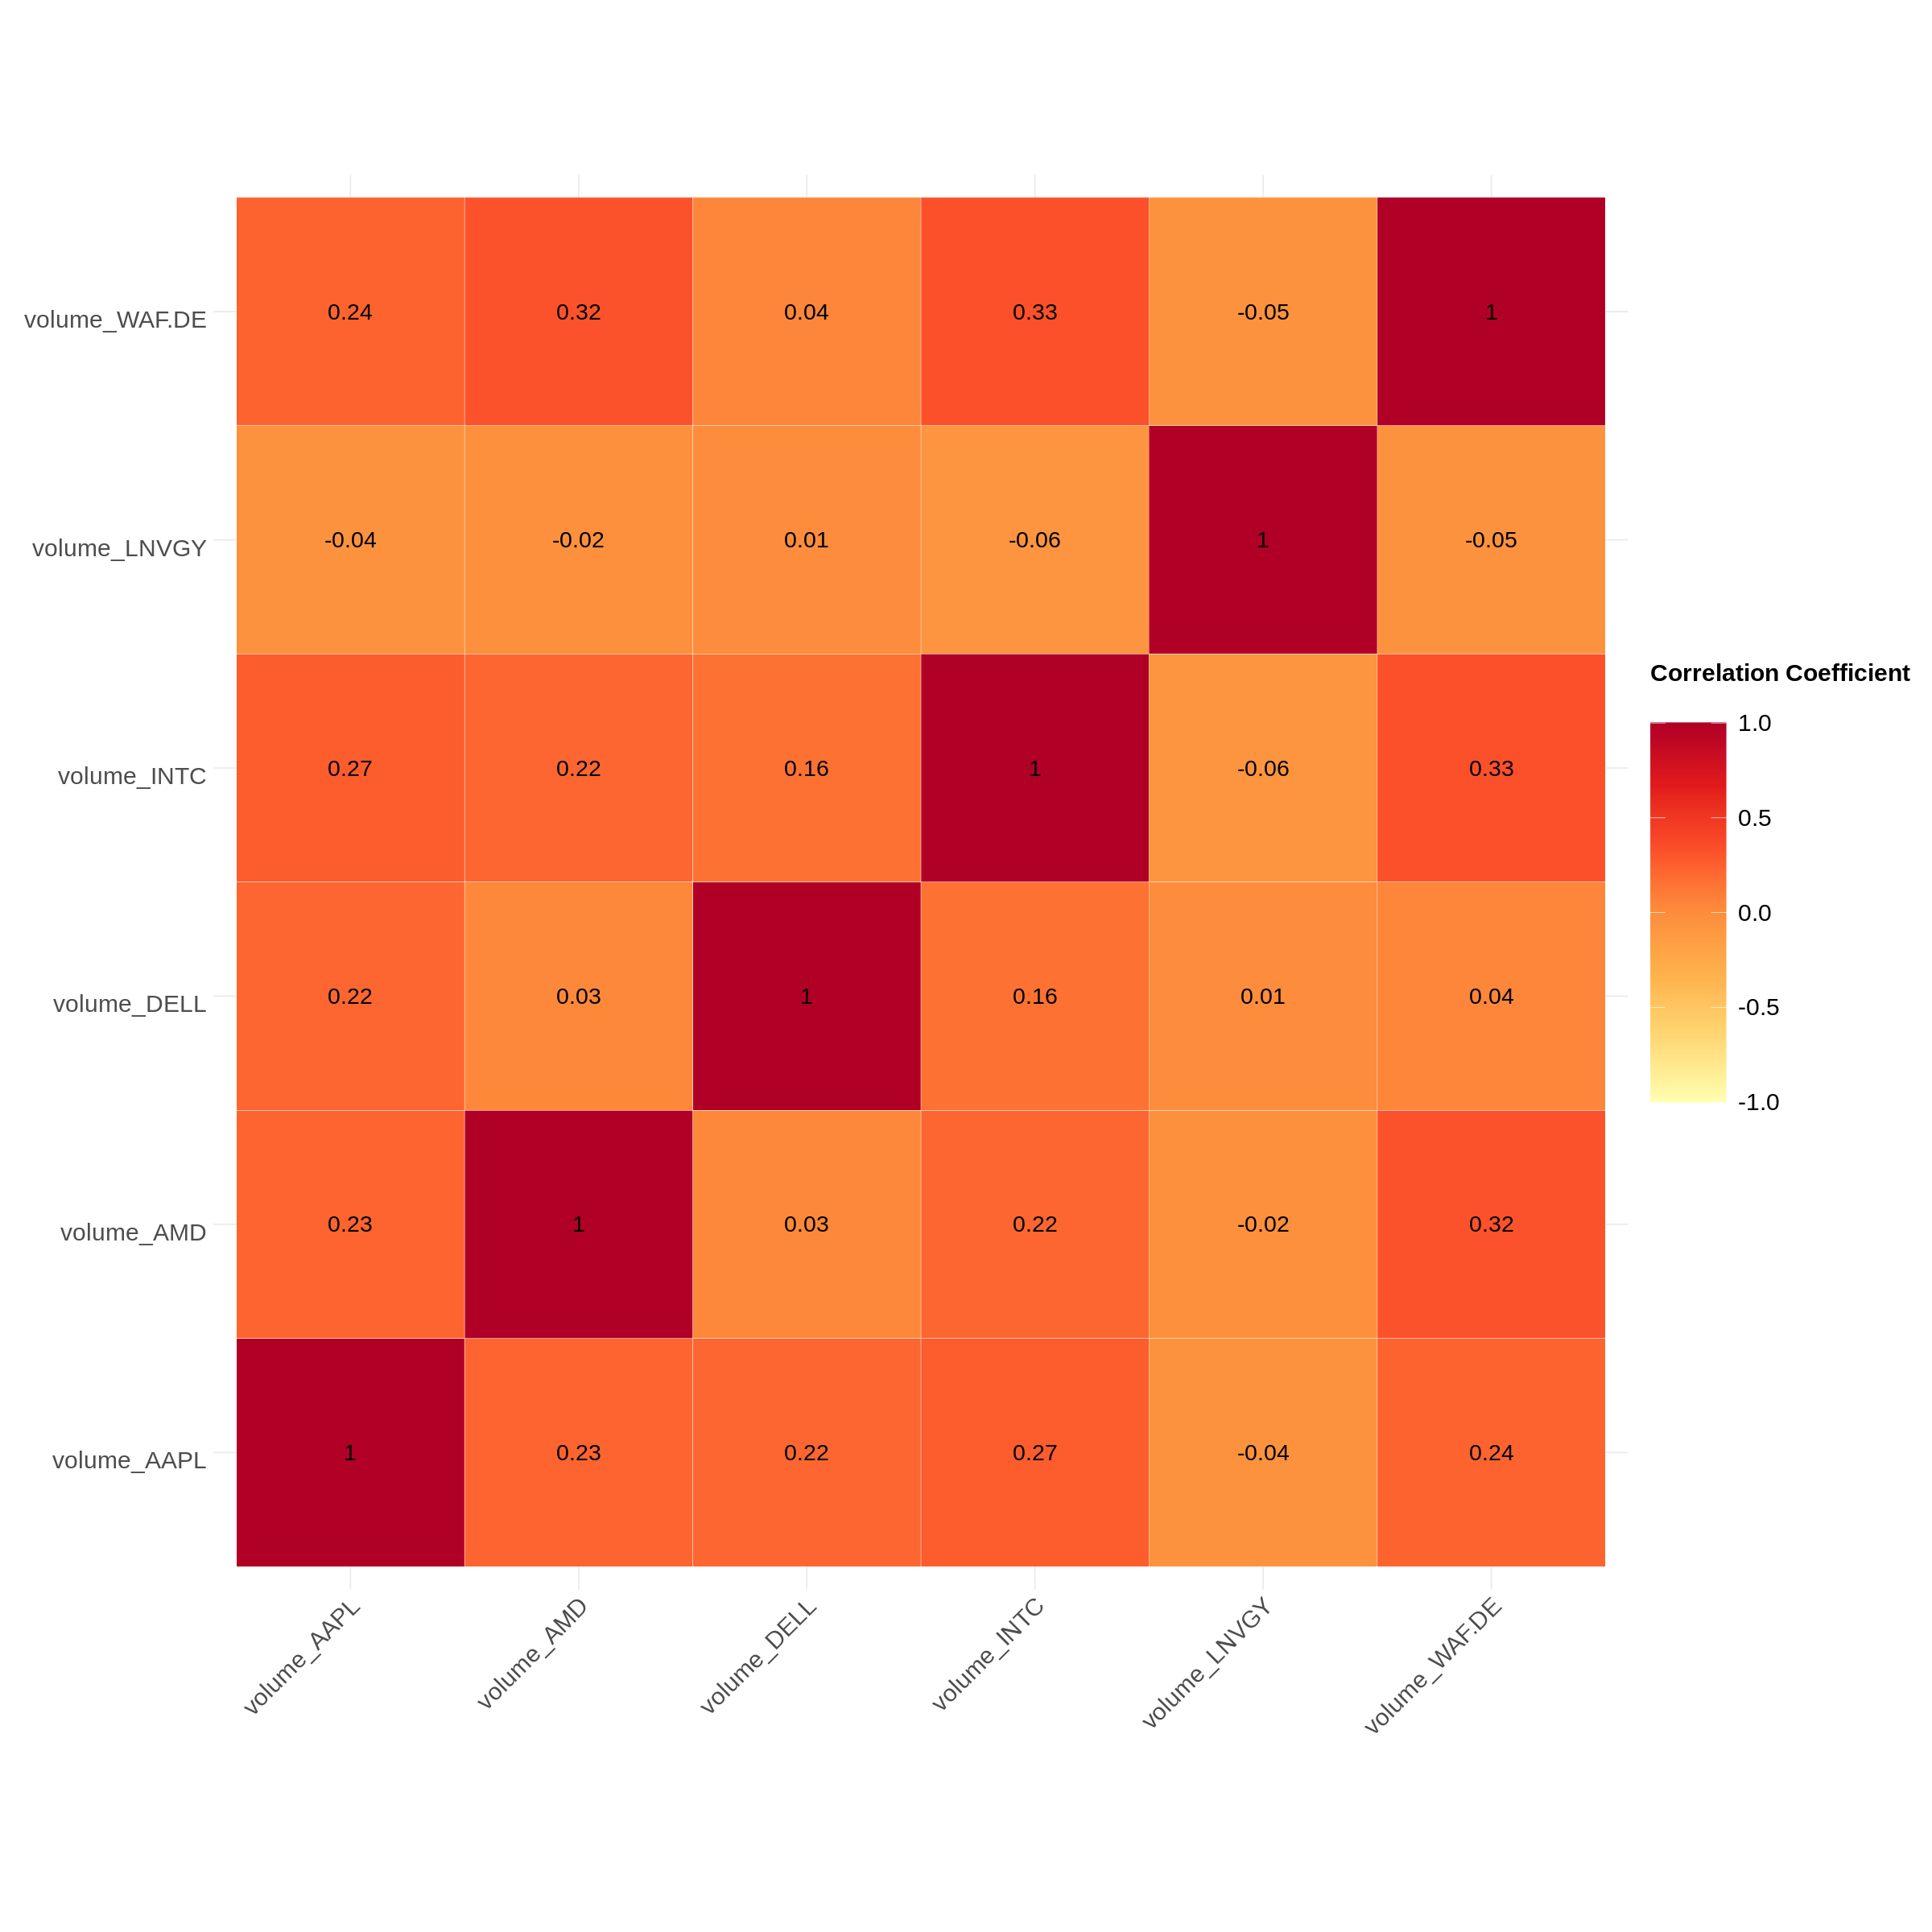

In [75]:
plt_index_corr_matrix <- corr_matrix_intel_index %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette = "YlOrRd",
    direction = 1, limits = c(-1, 1)
  ) +
  labs(x = "", y = "") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var2, var1, label = round(corr, 2)), color = "black", size = 6)
plt_index_corr_matrix

### Methods: Plan

***!!!DELETE***

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Finish this section by reflecting on how your final report might play out:

What methods do you plan on using?
What do you expect to achieve?
What impact could your results have?

### References

***!!!DELETE***

At least two citations of literature relevant to the project. The citation format is your choice – just be consistent. Make sure to cite the source of your data as well.